# Check results from two different runs

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from LatticeData import *

# Unity v Smith

## Load data

In [2]:
v1 = LatticeData(datadir = "/data_smith/")
src_dir1 = "/run_7_18_23_stats/"
v1.copy_data_from_directory(src_dir1)
v1label = "Smith"

v2 = LatticeData(datadir = "/data_unity/")
src_dir2 = "/run_8_17_23_unity/"
v2.copy_data_from_directory(src_dir2)
v2label = "Unity"

df1 = v1.do_stats(therm = 0.0)
df2 = v2.do_stats(therm = 0.0)
df1.columns = pd.MultiIndex.from_product([df1.columns, [v1label]])
df2.columns = pd.MultiIndex.from_product([df2.columns, [v2label]])
df_all = pd.concat([df1,df2])
df_all = df_all.stack()
df_all.index.set_names('version', level=len(df_all.index.names)-1, inplace=True)

run L_180_beta_1.600000_itheta_0.000000_ntherm_5000_nMC_50000_freq_100 not yet complete: 378 lines
run L_180_beta_1.600000_itheta_2.356194_ntherm_5000_nMC_50000_freq_100 not yet complete: 391 lines
run L_180_beta_1.600000_itheta_3.141593_ntherm_5000_nMC_50000_freq_100 not yet complete: 237 lines
run L_180_beta_1.600000_itheta_1.570796_ntherm_5000_nMC_50000_freq_100 not yet complete: 381 lines
run L_180_beta_1.600000_itheta_0.785398_ntherm_5000_nMC_50000_freq_100 not yet complete: 240 lines
run L_40_beta_1.600000_itheta_0.785398_ntherm_4000_nMC_10000_freq_100 not yet complete: 98 lines
run L_40_beta_1.600000_itheta_3.141593_ntherm_4000_nMC_10000_freq_100 not yet complete: 80 lines


## Compare Timing

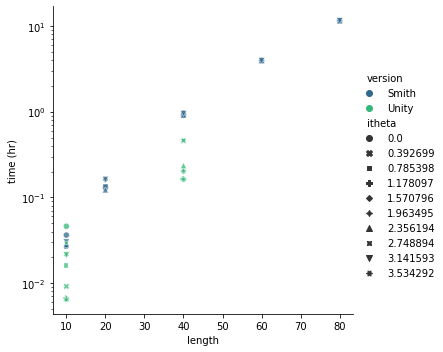

In [3]:
sns.relplot(data = df_all, x = "length", y = "time (hr)", hue = "version", 
                style = "itheta", alpha = 0.75, palette = "viridis")
plt.yscale('log')
plt.show()

## Compare Observables with RelPlot in Seaborn

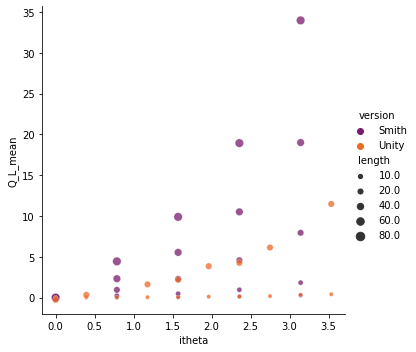

In [4]:
sns.relplot(data = df_all, x = "itheta", y = "Q_L_mean", hue = "version", 
                size = "length", alpha = 0.75, palette = "inferno")
#plt.yscale('log')
plt.show()

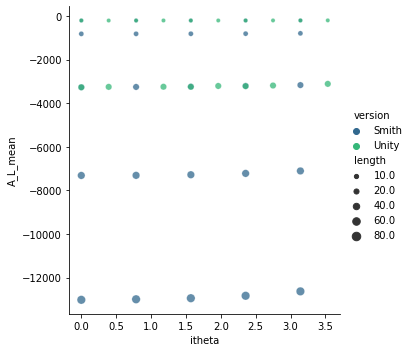

In [5]:
sns.relplot(data = df_all, x = "itheta", y = "A_L_mean", hue = "version", 
                size = "length",alpha = 0.75, palette = "viridis")
#plt.yscale('log')
plt.show()

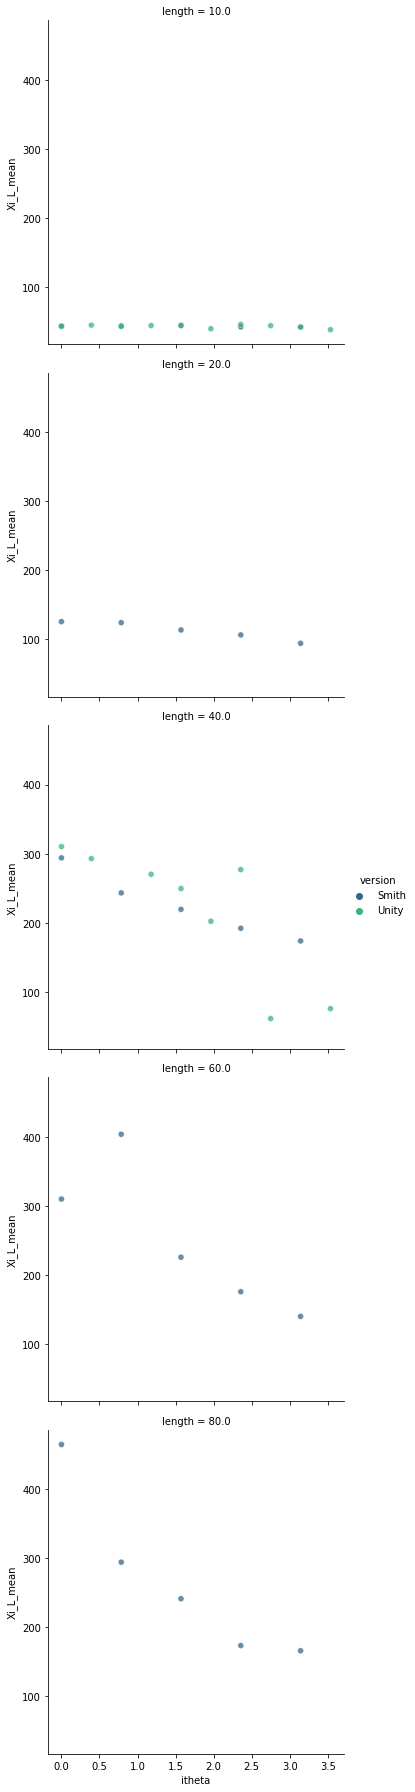

In [6]:
sns.relplot(data = df_all, x = "itheta", y = "Xi_L_mean", hue = "version", 
                row = "length", alpha = 0.75, palette = "viridis")
#plt.yscale('log')
plt.show()

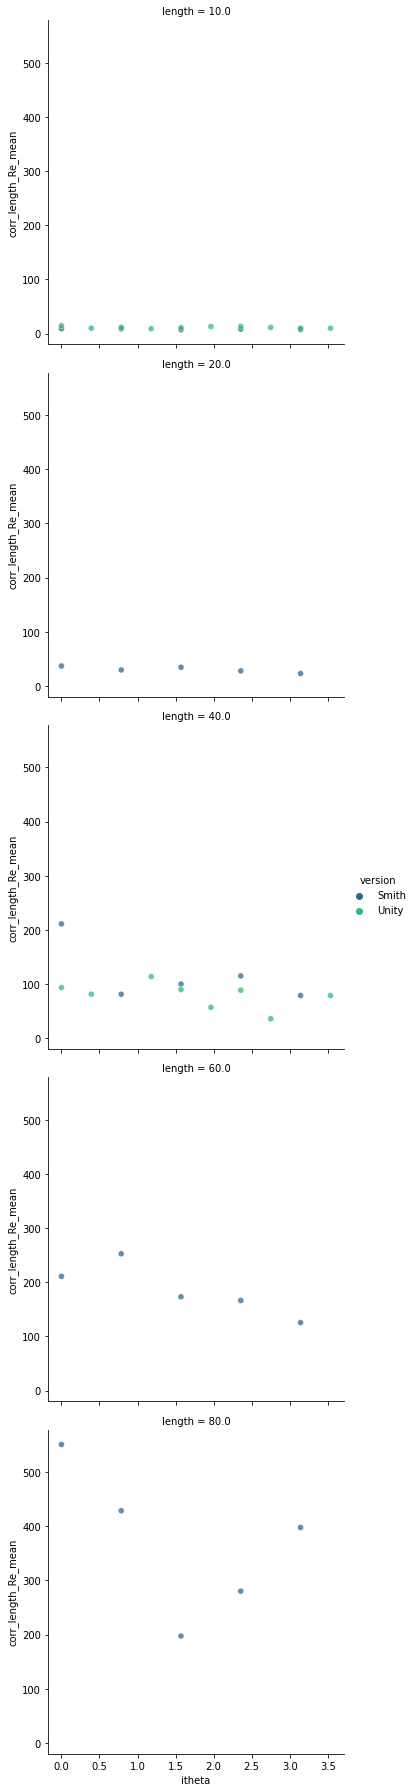

In [7]:
sns.relplot(data = df_all, x = "itheta", y = "corr_length_Re_mean", hue = "version", 
                row = "length", alpha = 0.75, palette = "viridis")
#plt.yscale('log')
plt.show()

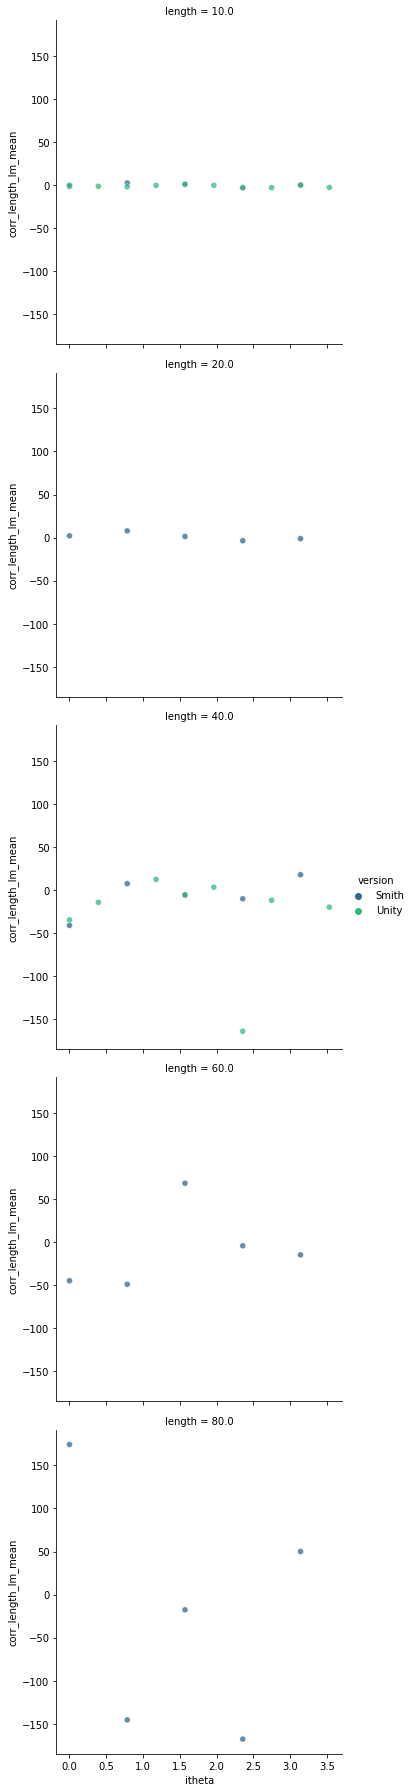

In [8]:
sns.relplot(data = df_all, x = "itheta", y = "corr_length_Im_mean", hue = "version", 
                row = "length", alpha = 0.75, palette = "viridis")
#plt.yscale('log')
plt.show()

## Check Observables with errorbars

In [9]:
p1 = v1.all_params()
p2 = v2.all_params()

In [14]:
sorted(p2["itheta/pi"].unique())

[0.0,
 0.12499997399448842,
 0.24999994798897685,
 0.3749999219834652,
 0.4999998959779537,
 0.6249998699724421,
 0.7499998439669304,
 0.8750001362713051,
 1.0000001102657934,
 1.125000084260282]

In [11]:
lengths = [10,20,40]
colors1 = sns.color_palette("Blues", len(lengths))
colors2 = sns.color_palette("Reds", len(lengths))

observable = "Q_L"
for n,length in enumerate(lengths):
    x1,y1,err1 = v1.get_plot_data(obs = observable, L = length, beta = 1.6, nMC = 10000, ntherm = 1000, freq = 100)
    plt.errorbar(x1, y1, yerr = err1, marker = ".", ls = "none", color = colors1[n], alpha = 0.5,
                 label =v1label+", L="+str(length))
for n,length in enumerate(lengths):
    x2,y2,err2 = v2.get_plot_data(obs = observable, L = length, beta = 1.6, nMC = 10000, ntherm = 1000, freq = 100)
    plt.errorbar(x2, y2, yerr = err2, marker = ".", ls = "none", color = colors2[n], alpha = 0.5,
                 label =v2label+", L="+str(length))
plt.legend()
plt.ylim([-0.00001,0.00001])
plt.title(observable+" comparison for Smith and Unity")
plt.tight_layout()
plt.show()

ValueError: cannot join with no overlapping index names

In [ ]:
observable = "A_L"
for n,length in enumerate(lengths):
    x1,y1,err1 = v1.get_plot_data(obs = observable, L = length, beta = 1.6, nMC = 10000, ntherm = 1000)
    plt.errorbar(x1, y1, yerr = err1, marker = ".", ls = "none", color = colors1[n], 
                 label =v1label+", L="+str(length))
for n,length in enumerate(lengths):
    x2,y2,err2 = v2.get_plot_data(obs = observable, L = length, beta = 1.6, nMC = 10000, ntherm = 1000)
    plt.errorbar(x2, y2, yerr = err2, marker = ".", ls = "none", color = colors2[n], 
                 label =v2label+", L="+str(length))
plt.xlabel("itheta")
plt.ylabel(observable)
plt.legend()
plt.title(observable+" comparison for sine and cosine")
plt.show()

# QL with Sine v Cosine

## Load data

In [ ]:
v1 = LatticeData(datadir = "/data_nls_sin/")
src_dir1 = "/run_7_14_23_sin/"
v1.copy_data_from_directory(src_dir1)
v1label = "sin"

v2 = LatticeData(datadir = "/data_nls_cos/")
src_dir2 = "/run_7_14_23_cos/"
v2.copy_data_from_directory(src_dir2)
v2label = "cos"

df1 = v1.do_stats(therm = 0.0)
df2 = v2.do_stats(therm = 0.0)
df1.columns = pd.MultiIndex.from_product([df1.columns, [v1label]])
df2.columns = pd.MultiIndex.from_product([df2.columns, [v2label]])
df_all = pd.concat([df1,df2])
df_all = df_all.stack()
df_all.index.set_names('version', level=len(df_all.index.names)-1, inplace=True)

## Compare timing

In [ ]:
sns.relplot(data = df_all, x = "length", y = "time (hr)", hue = "version", 
                col = "itheta", alpha = 0.75, palette = "viridis")
#plt.yscale('log')
plt.show()

## Compare Observables with RelPlot in Seaborn

In [ ]:
sns.relplot(data = df_all, x = "itheta", y = "Q_L_mean", hue = "version", 
                row = "length", alpha = 0.75, palette = "inferno")
#plt.yscale('log')
plt.show()

In [ ]:
sns.relplot(data = df_all, x = "itheta", y = "A_L_mean", hue = "version", 
                size = "length",alpha = 0.75, palette = "viridis")
#plt.yscale('log')
plt.show()

In [ ]:
sns.relplot(data = df_all, x = "itheta", y = "Xi_L_mean", hue = "version", 
                size = "length", alpha = 0.75, palette = "viridis")
#plt.yscale('log')
plt.show()

In [ ]:
sns.relplot(data = df_all, x = "itheta", y = "corr_length_Re_mean", hue = "version", 
                size = "length", alpha = 0.75, palette = "viridis")
#plt.yscale('log')
plt.show()

In [ ]:
sns.relplot(data = df_all, x = "itheta", y = "corr_length_Im_mean", hue = "version", 
                col = "length", alpha = 0.75, palette = "viridis")
#plt.yscale('log')
plt.show()

## Check Observables with errorbars

In [ ]:
lengths = [10,20,40]
colors1 = sns.color_palette("Blues", len(lengths))
colors2 = sns.color_palette("Reds", len(lengths))

observable = "Q_L"
for n,length in enumerate(lengths):
    x1,y1,err1 = v1.get_plot_data(obs = observable, L = length, beta = 1.6, nMC = 10000, ntherm = 1000)
    plt.errorbar(x1, y1, yerr = err1, marker = ".", ls = "none", color = colors1[n], alpha = 0.5,
                 label =v1label+", L="+str(length))
for n,length in enumerate(lengths):
    x2,y2,err2 = v2.get_plot_data(obs = observable, L = length, beta = 1.6, nMC = 10000, ntherm = 1000)
    plt.errorbar(x2, y2, yerr = err2, marker = ".", ls = "none", color = colors2[n], alpha = 0.5,
                 label =v2label+", L="+str(length))
plt.legend()
plt.ylim([-0.00001,0.00001])
plt.title(observable+" comparison for sine and cosine")
plt.tight_layout()
plt.show()

In [ ]:
lengths = [10,20,40,80]
colors1 = sns.color_palette("Blues", len(lengths))
colors2 = sns.color_palette("Reds", len(lengths))

In [ ]:
observable = "Q_L"
for n,length in enumerate(lengths):
    x1,y1,err1 = v1.get_plot_data(obs = observable, L = length, beta = 1.6, nMC = 10000, ntherm = 1000)
    plt.errorbar(x1, y1, yerr = err1, marker = ".", ls = "none", color = colors1[n], 
                 label =v1label+", L="+str(length))
for n,length in enumerate(lengths):
    x2,y2,err2 = v2.get_plot_data(obs = observable, L = length, beta = 1.6, nMC = 10000, ntherm = 1000)
    plt.errorbar(x2, y2, yerr = err2, marker = ".", ls = "none", color = colors2[n], 
                 label =v2label+", L="+str(length))
plt.legend()
plt.xlabel("itheta")
plt.ylabel(observable)
plt.ylim([-0.00001,0.00001])
plt.title(observable+" comparison for sine and cosine")
plt.show()

In [ ]:
observable = "A_L"
for n,length in enumerate(lengths):
    x1,y1,err1 = v1.get_plot_data(obs = observable, L = length, beta = 1.6, nMC = 10000, ntherm = 1000)
    plt.errorbar(x1, y1, yerr = err1, marker = ".", ls = "none", color = colors1[n], 
                 label =v1label+", L="+str(length))
for n,length in enumerate(lengths):
    x2,y2,err2 = v2.get_plot_data(obs = observable, L = length, beta = 1.6, nMC = 10000, ntherm = 1000)
    plt.errorbar(x2, y2, yerr = err2, marker = ".", ls = "none", color = colors2[n], 
                 label =v2label+", L="+str(length))
plt.xlabel("itheta")
plt.ylabel(observable)
plt.legend()
plt.title(observable+" comparison for sine and cosine")
plt.show()

# QL using cosine with and without adjustment for range

## Load data

In [ ]:
v1 = LatticeData(datadir = "/data_nls_cos/")
src_dir1 = "/run_7_14_23_cos/"
v1.collect_data(src_dir1)
v1label = "adjusted"

v2 = LatticeData(datadir = "/data_nls_cos_adj/")
src_dir2 = "/run_7_17_23_cos_adj/"
v2.collect_data(src_dir2)
v2label = "not adjusted"

df1 = v1.do_stats(therm = 0.0)
df2 = v2.do_stats(therm = 0.0)
df1.columns = pd.MultiIndex.from_product([df1.columns, [v1label]])
df2.columns = pd.MultiIndex.from_product([df2.columns, [v2label]])
df_all = pd.concat([df1,df2])
df_all = df_all.stack()
df_all.index.set_names('version', level=len(df_all.index.names)-1, inplace=True)

## Compare Observables with RelPlot in Seaborn

In [ ]:
sns.relplot(data = df_all, x = "itheta", y = "Q_L_mean", hue = "version", 
                row = "length", alpha = 0.75, palette = "inferno")
#plt.yscale('log')
plt.show()

## Compare Observables with Errorbars

In [ ]:
lengths = [10,20,40]
colors1 = sns.color_palette("Blues", len(lengths))
colors2 = sns.color_palette("Reds", len(lengths))

observable = "Q_L"
for n,length in enumerate(lengths):
    x1,y1,err1 = v1.get_plot_data(obs = observable, L = length, beta = 1.6, nMC = 10000, ntherm = 1000)
    plt.errorbar(x1, y1, yerr = err1, marker = ".", ls = "none", color = colors1[n], alpha = 0.5,
                 label =v1label+", L="+str(length))
for n,length in enumerate(lengths):
    x2,y2,err2 = v2.get_plot_data(obs = observable, L = length, beta = 1.6, nMC = 10000, ntherm = 1000)
    plt.errorbar(x2, y2, yerr = err2, marker = ".", ls = "none", color = colors2[n], alpha = 0.5,
                 label =v2label+", L="+str(length))
plt.legend()
plt.ylim([-0.00001,0.00001])
plt.title(observable+" comparison for cosine with and without domain adjustments")
plt.tight_layout()
plt.show()

# QL and AL looking for AL double-counting

## Load Data

In [ ]:
v1 = LatticeData(datadir = "/data_nls_sin/")
src_dir1 = "/run_7_14_23_sin/"
v1.collect_data(src_dir1)
v1label = "original"

v2 = LatticeData(datadir = "/data_nls_AL/")
src_dir2 = "/run_7_17_23_AL/"
v2.collect_data(src_dir2)
v2label = "double-counting removed"

df1 = v1.do_stats(therm = 0.0)
df2 = v2.do_stats(therm = 0.0)
df1.columns = pd.MultiIndex.from_product([df1.columns, [v1label]])
df2.columns = pd.MultiIndex.from_product([df2.columns, [v2label]])
df_all = pd.concat([df1,df2])
df_all = df_all.stack()
df_all.index.set_names('version', level=len(df_all.index.names)-1, inplace=True)

## Compare Observables with RelPlot in Seaborn

In [ ]:
sns.relplot(data = df_all, x = "itheta", y = "Q_L_mean", hue = "version", 
                row = "length", alpha = 0.75, palette = "inferno")
#plt.yscale('log')
plt.show()

In [ ]:
sns.relplot(data = df_all, x = "itheta", y = "A_L_mean", hue = "version", 
                row = "length", alpha = 0.75, palette = "inferno")
#plt.yscale('log')
plt.show()

## Compare Observables with error bars

In [ ]:
lengths = [10,20]
colors1 = sns.color_palette("Blues", len(lengths))
colors2 = sns.color_palette("Reds", len(lengths))

observable = "Q_L"
for n,length in enumerate(lengths):
    x1,y1,err1 = v1.get_plot_data(obs = observable, L = length, beta = 1.6, nMC = 10000, ntherm = 1000)
    plt.errorbar(x1, y1, yerr = err1, marker = ".", ls = "none", color = colors1[n], alpha = 0.5,
                 label =v1label+", L="+str(length))
for n,length in enumerate(lengths):
    x2,y2,err2 = v2.get_plot_data(obs = observable, L = length, beta = 1.6, nMC = 10000, ntherm = 1000)
    plt.errorbar(x2, y2, yerr = err2, marker = ".", ls = "none", color = colors2[n], alpha = 0.5,
                 label =v2label+", L="+str(length))
plt.legend()
#plt.ylim([-0.00001,0.00001])
plt.title(observable+" comparison with and without the double-counting of AL")
plt.tight_layout()
plt.show()

# QL using arcsin to calculate QLtriangle, with and without AL double counting

## load data

In [ ]:
v1 = LatticeData(datadir = "/data_nls_sin/")
src_dir1 = "/run_7_14_23_sin/"
v1.collect_data(src_dir1)
v1label = "original"

v2 = LatticeData(datadir = "/data_nls_AL_sin/")
src_dir2 = "/run_7_18_23/"
v2.collect_data(src_dir2)
v2label = "double-counting removed"

df1 = v1.do_stats(therm = 0.0)
df2 = v2.do_stats(therm = 0.0)
df1.columns = pd.MultiIndex.from_product([df1.columns, [v1label]])
df2.columns = pd.MultiIndex.from_product([df2.columns, [v2label]])
df_all = pd.concat([df1,df2])
df_all = df_all.stack()
df_all.index.set_names('version', level=len(df_all.index.names)-1, inplace=True)

## compare observables with relplot in seaborn

In [ ]:
sns.relplot(data = df_all, x = "itheta", y = "Q_L_mean", hue = "version", 
                row = "length", alpha = 0.75, palette = "inferno")
#plt.yscale('log')
plt.show()

## compare observables with errorbars

In [ ]:
lengths = [10,20,40]
colors1 = sns.color_palette("Blues", len(lengths))
colors2 = sns.color_palette("Reds", len(lengths))

observable = "Q_L"
for n,length in enumerate(lengths):
    x1,y1,err1 = v1.get_plot_data(obs = observable, L = length, beta = 1.6, nMC = 10000, ntherm = 1000)
    plt.errorbar(x1, y1, yerr = err1, marker = ".", ls = "none", color = colors1[n], alpha = 0.5,
                 label =v1label+", L="+str(length))
for n,length in enumerate(lengths):
    x2,y2,err2 = v2.get_plot_data(obs = observable, L = length, beta = 1.6, nMC = 10000, ntherm = 1000)
    plt.errorbar(x2, y2, yerr = err2, marker = ".", ls = "none", color = colors2[n], alpha = 0.5,
                 label =v2label+", L="+str(length))
plt.legend()
#plt.ylim([-0.00001,0.00001])
plt.title(observable+" comparison with and without the double-counting of AL")
plt.tight_layout()
plt.show()

# Big stats version

## Load data

In [ ]:
v1 = LatticeData(datadir = "/data_nls_AL_sin/")
src_dir1 = "/run_7_18_23/"
v1.collect_data(src_dir1)
v1label = "original"

v2 = LatticeData(datadir = "/data_nls_AL_sin_stats/")
src_dir2 = "/run_7_18_23_stats/"
v2.collect_data(src_dir2)
v2label = "large ntherm, nMC"

df1 = v1.do_stats(therm = 0.0)
df2 = v2.do_stats(therm = 0.0)
df1.columns = pd.MultiIndex.from_product([df1.columns, [v1label]])
df2.columns = pd.MultiIndex.from_product([df2.columns, [v2label]])
df_all = pd.concat([df1,df2])
df_all = df_all.stack()
df_all.index.set_names('version', level=len(df_all.index.names)-1, inplace=True)

## compare observables with relplot in seaborn

In [ ]:
sns.relplot(data = df_all, x = "itheta", y = "Q_L_mean", hue = "version", 
                row = "length", alpha = 0.75, palette = "inferno")
#plt.yscale('log')
plt.show()

## compare observables with errorbars

In [ ]:
lengths = [10,20,40]
colors1 = sns.color_palette("Blues", len(lengths))
colors2 = sns.color_palette("Reds", len(lengths))

observable = "Q_L"
for n,length in enumerate(lengths):
    x1,y1,err1 = v1.get_plot_data(obs = observable, L = length, beta = 1.6, nMC = 10000, ntherm = 1000)
    plt.errorbar(x1, y1, yerr = err1, marker = ".", ls = "none", color = colors1[n], alpha = 0.5,
                 label =v1label+", L="+str(length))
    print(x1)
for n,length in enumerate(lengths):
    x2,y2,err2 = v2.get_plot_data(obs = observable, L = length, beta = 1.6, nMC = 50000, ntherm = 5000)
    plt.errorbar(x2, y2, yerr = err2, marker = ".", ls = "none", color = colors2[n], alpha = 0.5,
                 label =v2label+", L="+str(length))
plt.legend()
#plt.ylim([-0.00001,0.00001])
plt.title(observable+" larger stats")
plt.tight_layout()
plt.show()